In [1]:
import math

In [2]:
import pandas_datareader as web

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
#from sklearn import preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from keras.models import Sequential

In [8]:
from keras.layers import Dense, LSTM

In [9]:
import matplotlib.pyplot as plt

In [10]:
import datetime
from datetime import date

In [11]:
plt.style.use('fivethirtyeight')

In [12]:
stock = 'box'

years_of_data_to_process = 25
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

In [13]:
df = web.DataReader(stock, data_source='yahoo', start = start, end = date)
df.dropna(inplace= True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-23,24.730000,20.160000,20.200001,23.230000,42593200,23.230000
2015-01-26,24.389999,22.500000,23.670000,22.600000,8677200,22.600000
2015-01-27,22.469999,21.170000,22.000000,21.299999,3272500,21.299999
2015-01-28,21.840000,19.600000,21.620001,19.780001,5047400,19.780001
2015-01-29,19.950001,18.510000,19.900000,18.799999,3419500,18.799999
...,...,...,...,...,...,...
2021-06-14,25.420000,24.879999,25.070000,25.129999,2552000,25.129999
2021-06-15,25.230000,24.945000,25.110001,25.200001,2112100,25.200001
2021-06-16,25.448999,24.790001,25.209999,25.139999,3216500,25.139999


In [14]:
df.shape

(1613, 6)

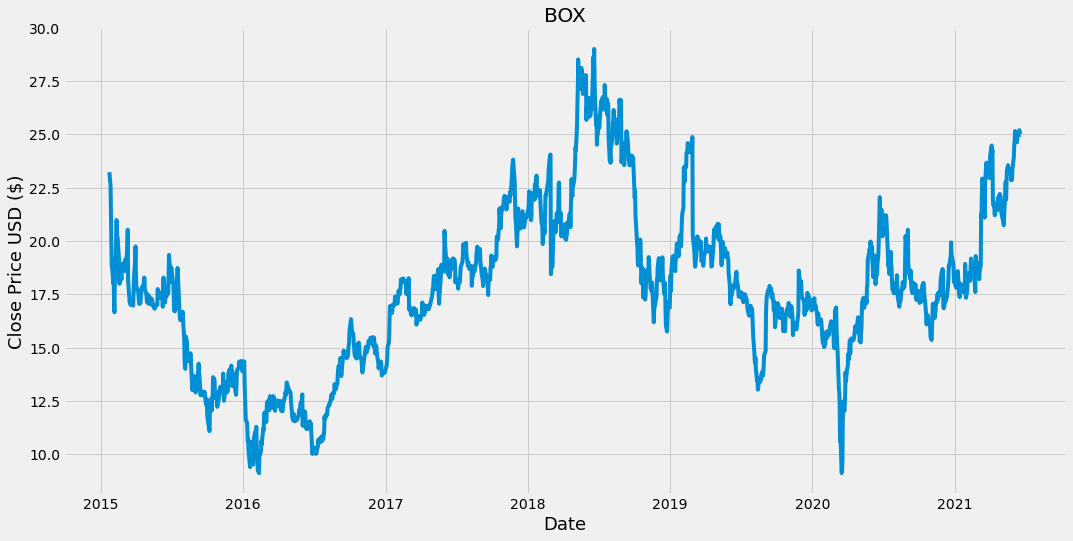

In [15]:
plt.figure(figsize=(16,8))

plt.title(stock.upper())
#plt.title( plt.title(str(stock)))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [16]:
data =df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) *.8)
training_data_len

1291

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.70940168],
       [0.67772751],
       [0.61236798],
       ...,
       [0.80542983],
       [0.79738559],
       [0.79788837]])

In [18]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
#    if i <= 60:
#        print (x_train)
#        print (y_train)
#        print ()
    

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1231, 60, 1)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
    

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x_train, y_train, batch_size=128, epochs=200)

Epoch 1/200
10/10 [==============================] - 14s 56ms/step - loss: 0.1425
Epoch 2/200
10/10 [==============================] - 1s 56ms/step - loss: 0.0207
Epoch 3/200
10/10 [==============================] - 1s 53ms/step - loss: 0.0107
Epoch 4/200
10/10 [==============================] - 1s 53ms/step - loss: 0.0063
Epoch 5/200
10/10 [==============================] - 1s 63ms/step - loss: 0.0042
Epoch 6/200
10/10 [==============================] - 1s 58ms/step - loss: 0.0033
Epoch 7/200
10/10 [==============================] - 1s 57ms/step - loss: 0.0029
Epoch 8/200
10/10 [==============================] - 1s 54ms/step - loss: 0.0027
Epoch 9/200
10/10 [==============================] - 1s 53ms/step - loss: 0.0027
Epoch 10/200
10/10 [==============================] - 1s 53ms/step - loss: 0.0027
Epoch 11/200
10/10 [==============================] - 1s 52ms/step - loss: 0.0026
Epoch 12/200
10/10 [==============================] - 1s 53ms/step - loss: 0.0026
Epoch 13/200
10/10 [====

10/10 [==============================] - 1s 78ms/step - loss: 8.8813e-04
Epoch 100/200
10/10 [==============================] - 1s 59ms/step - loss: 0.0011
Epoch 101/200
10/10 [==============================] - 1s 53ms/step - loss: 7.4639e-04
Epoch 102/200
10/10 [==============================] - 1s 52ms/step - loss: 8.9521e-04
Epoch 103/200
10/10 [==============================] - 1s 51ms/step - loss: 8.6581e-04
Epoch 104/200
10/10 [==============================] - 1s 51ms/step - loss: 8.2944e-04
Epoch 105/200
10/10 [==============================] - 1s 50ms/step - loss: 7.3891e-04
Epoch 106/200
10/10 [==============================] - 1s 51ms/step - loss: 8.0150e-04
Epoch 107/200
10/10 [==============================] - 1s 50ms/step - loss: 7.9469e-04
Epoch 108/200
10/10 [==============================] - 0s 50ms/step - loss: 7.5501e-04
Epoch 109/200
10/10 [==============================] - 1s 55ms/step - loss: 8.2092e-04
Epoch 110/200
10/10 [==============================] - 1s 52m

10/10 [==============================] - 1s 55ms/step - loss: 6.5332e-04
Epoch 194/200
10/10 [==============================] - 1s 55ms/step - loss: 6.5973e-04
Epoch 195/200
10/10 [==============================] - 1s 53ms/step - loss: 6.3285e-04
Epoch 196/200
10/10 [==============================] - 1s 52ms/step - loss: 7.9153e-04
Epoch 197/200
10/10 [==============================] - 1s 54ms/step - loss: 7.1584e-04
Epoch 198/200
10/10 [==============================] - 1s 53ms/step - loss: 6.2134e-04
Epoch 199/200
10/10 [==============================] - 1s 59ms/step - loss: 7.9413e-04
Epoch 200/200
10/10 [==============================] - 1s 56ms/step - loss: 6.7521e-04


In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [26]:
x_test = np.array(x_test)

In [27]:
x_test =  np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
predictions = model.predict(x_test)
predictions =  scaler.inverse_transform(predictions)

In [29]:
rmse = np.sqrt(np.mean(predictions -y_test) **2)
print ("    RMSE = %f.4" %rmse)

    RMSE = 0.052635.4


<ipython-input-30-6e6dce25b9c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

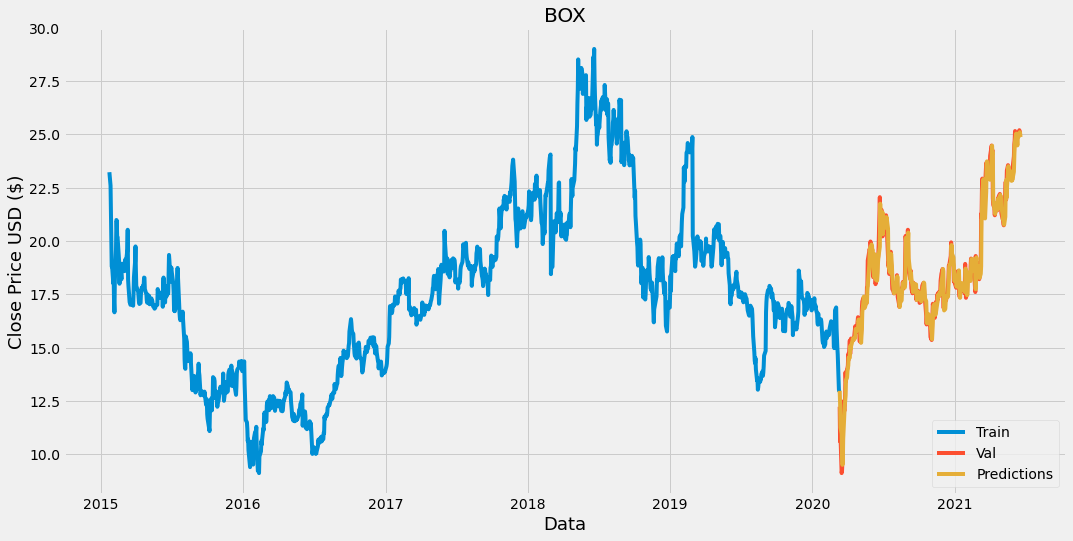

In [30]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title(stock.upper())
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot()
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [31]:
print(valid)

                Close  Predictions
Date                              
2020-03-11  12.230000    12.977224
2020-03-12  10.600000    12.438309
2020-03-13  10.930000    11.261310
2020-03-16   9.120000    10.970509
2020-03-17   9.230000     9.948010
...               ...          ...
2021-06-14  25.129999    24.913734
2021-06-15  25.200001    25.028938
2021-06-16  25.139999    25.106218
2021-06-17  24.980000    25.044552
2021-06-18  24.990000    24.879505

[322 rows x 2 columns]


In [32]:
# print (valid.iloc[-1,0], valid.iloc[-1,1])
print ("\n ============> Close Price over Predicate Price \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %((valid.iloc[-5,0] - valid.iloc[-5,1]), (valid.iloc[-4,0] - valid.iloc[-4,1]),(valid.iloc[-3,0] - valid.iloc[-3,1]),(valid.iloc[-2,0] - valid.iloc[-2,1]),(valid.iloc[-1,0] - valid.iloc[-1,1])))


 ============> Close Price over Predicate Price 
 ============> 0.2163....0.1711....0.0338....-0.0646....0.1105....<=============


In [33]:
stock_quote = web.DataReader(stock, data_source =  'yahoo', start = start , end = date)
new_df = stock_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[24.891186]]


In [34]:
#stock_quote2 = web.DataReader(stock, data_source =  'yahoo', start = date , end = date)
#print (stock_quote2['Close'])